In [1]:
# Import required modules
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Read in csv file
csv_file = pd.read_csv('../CSV_Files/spreadspoke_scores.csv')
nfl_df = pd.DataFrame(csv_file)
nfl_df

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
0,9/2/1966,1966,1,False,Miami Dolphins,14,23,Oakland Raiders,NaN,NaN,NaN,Orange Bowl,False,83.0,6.0,71.0,NaN
1,9/3/1966,1966,1,False,Houston Oilers,45,7,Denver Broncos,NaN,NaN,NaN,Rice Stadium,False,81.0,7.0,70.0,NaN
2,9/4/1966,1966,1,False,San Diego Chargers,27,7,Buffalo Bills,NaN,NaN,NaN,Balboa Stadium,False,70.0,7.0,82.0,NaN
3,9/9/1966,1966,2,False,Miami Dolphins,14,19,New York Jets,NaN,NaN,NaN,Orange Bowl,False,82.0,11.0,78.0,NaN
4,9/10/1966,1966,1,False,Green Bay Packers,24,3,Baltimore Colts,NaN,NaN,NaN,Lambeau Field,False,64.0,8.0,62.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13796,1/21/2024,2023,Division,True,Buffalo Bills,24,27,Kansas City Chiefs,BUF,-2.5,46,Highmark Stadium,False,25.0,11.0,67.0,NaN
13797,1/21/2024,2023,Division,True,Detroit Lions,31,23,Tampa Bay Buccaneers,DET,-6.0,49.5,Ford Field,False,72.0,0.0,NaN,indoor
13798,1/28/2024,2023,Conference,True,Baltimore Ravens,10,17,Kansas City Chiefs,BAL,-4.5,44,M&T Bank Stadium,False,47.0,7.0,83.0,NaN
13799,1/28/2024,2023,Conference,True,San Francisco 49ers,34,31,Detroit Lions,SF,-7.5,53.5,Levi's Stadium,False,69.0,5.0,55.0,NaN


In [3]:
# Cut down DataFrame to see the last 5 years
five_year_df = nfl_df[nfl_df['schedule_season'] > 2018]
five_year_df

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
12411,9/5/2019,2019,1,False,Chicago Bears,3,10,Green Bay Packers,CHI,-3.0,46.5,Soldier Field,False,NaN,NaN,NaN,NaN
12412,9/8/2019,2019,1,False,Arizona Cardinals,27,27,Detroit Lions,DET,-3.0,45.5,University of Phoenix Stadium,False,72.0,0.0,NaN,indoor
12413,9/8/2019,2019,1,False,Carolina Panthers,27,30,Los Angeles Rams,LAR,-2.0,49.5,Bank of America Stadium,False,NaN,NaN,NaN,NaN
12414,9/8/2019,2019,1,False,Cleveland Browns,13,43,Tennessee Titans,CLE,-5.5,44,FirstEnergy Stadium,False,NaN,NaN,NaN,NaN
12415,9/8/2019,2019,1,False,Dallas Cowboys,35,17,New York Giants,DAL,-7.0,44,AT&T Stadium,False,72.0,0.0,NaN,indoor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13796,1/21/2024,2023,Division,True,Buffalo Bills,24,27,Kansas City Chiefs,BUF,-2.5,46,Highmark Stadium,False,25.0,11.0,67.0,NaN
13797,1/21/2024,2023,Division,True,Detroit Lions,31,23,Tampa Bay Buccaneers,DET,-6.0,49.5,Ford Field,False,72.0,0.0,NaN,indoor
13798,1/28/2024,2023,Conference,True,Baltimore Ravens,10,17,Kansas City Chiefs,BAL,-4.5,44,M&T Bank Stadium,False,47.0,7.0,83.0,NaN
13799,1/28/2024,2023,Conference,True,San Francisco 49ers,34,31,Detroit Lions,SF,-7.5,53.5,Levi's Stadium,False,69.0,5.0,55.0,NaN


In [4]:
# Clean data to make sure names and abbreviations are all the same.
five_year_df.loc[:,'team_home'] = five_year_df.loc[:,'team_home'].replace('Oakland Raiders', 'Las Vegas Raiders')
five_year_df.loc[:,'team_home'] = five_year_df.loc[:,'team_home'].replace({'Washington Redskins' : 'Washington Commanders', 
                                                                           'Washington Football Team' : 'Washington Commanders'})
five_year_df.loc[:,'team_away'] = five_year_df.loc[:,'team_away'].replace('Oakland Raiders', 'Las Vegas Raiders')
five_year_df.loc[:,'team_away'] = five_year_df.loc[:,'team_away'].replace({'Washington Redskins' : 'Washington Commanders', 
                                                                           'Washington Football Team' : 'Washington Commanders'})
five_year_df.loc[:,'team_favorite_id'] = five_year_df.loc[:,'team_favorite_id'].replace({'LV' : 'LVR'})

five_year_df

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
12411,9/5/2019,2019,1,False,Chicago Bears,3,10,Green Bay Packers,CHI,-3.0,46.5,Soldier Field,False,NaN,NaN,NaN,NaN
12412,9/8/2019,2019,1,False,Arizona Cardinals,27,27,Detroit Lions,DET,-3.0,45.5,University of Phoenix Stadium,False,72.0,0.0,NaN,indoor
12413,9/8/2019,2019,1,False,Carolina Panthers,27,30,Los Angeles Rams,LAR,-2.0,49.5,Bank of America Stadium,False,NaN,NaN,NaN,NaN
12414,9/8/2019,2019,1,False,Cleveland Browns,13,43,Tennessee Titans,CLE,-5.5,44,FirstEnergy Stadium,False,NaN,NaN,NaN,NaN
12415,9/8/2019,2019,1,False,Dallas Cowboys,35,17,New York Giants,DAL,-7.0,44,AT&T Stadium,False,72.0,0.0,NaN,indoor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13796,1/21/2024,2023,Division,True,Buffalo Bills,24,27,Kansas City Chiefs,BUF,-2.5,46,Highmark Stadium,False,25.0,11.0,67.0,NaN
13797,1/21/2024,2023,Division,True,Detroit Lions,31,23,Tampa Bay Buccaneers,DET,-6.0,49.5,Ford Field,False,72.0,0.0,NaN,indoor
13798,1/28/2024,2023,Conference,True,Baltimore Ravens,10,17,Kansas City Chiefs,BAL,-4.5,44,M&T Bank Stadium,False,47.0,7.0,83.0,NaN
13799,1/28/2024,2023,Conference,True,San Francisco 49ers,34,31,Detroit Lions,SF,-7.5,53.5,Levi's Stadium,False,69.0,5.0,55.0,NaN


In [5]:
# Remove unnecessary columns and add new columns to be used for analysis.
clean_df = five_year_df.drop(columns=['stadium', 'stadium_neutral', 'weather_temperature', 'weather_wind_mph',
                              'weather_humidity', 'weather_detail', 'spread_favorite', 'over_under_line'])
clean_df['team_home_id'] = ''
clean_df['team_away_id'] = ''
clean_df['result'] = ''
clean_df

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,team_home_id,team_away_id,result
12411,9/5/2019,2019,1,False,Chicago Bears,3,10,Green Bay Packers,CHI,,,
12412,9/8/2019,2019,1,False,Arizona Cardinals,27,27,Detroit Lions,DET,,,
12413,9/8/2019,2019,1,False,Carolina Panthers,27,30,Los Angeles Rams,LAR,,,
12414,9/8/2019,2019,1,False,Cleveland Browns,13,43,Tennessee Titans,CLE,,,
12415,9/8/2019,2019,1,False,Dallas Cowboys,35,17,New York Giants,DAL,,,
...,...,...,...,...,...,...,...,...,...,...,...,...
13796,1/21/2024,2023,Division,True,Buffalo Bills,24,27,Kansas City Chiefs,BUF,,,
13797,1/21/2024,2023,Division,True,Detroit Lions,31,23,Tampa Bay Buccaneers,DET,,,
13798,1/28/2024,2023,Conference,True,Baltimore Ravens,10,17,Kansas City Chiefs,BAL,,,
13799,1/28/2024,2023,Conference,True,San Francisco 49ers,34,31,Detroit Lions,SF,,,


In [6]:
# Read in and display new DataFrame with adjusted abbreviations to use for analysis.
key_path = pd.read_csv('../CSV_Files/nfl_teams.csv')
team_key_df = pd.DataFrame(key_path)
team_key_df['Abbreviation'] = team_key_df['Abbreviation'].replace('LV', 'LVR')

team_key_df

,ID,Name,Abbreviation,Conference,Division
0,1,Arizona Cardinals,ARI,NFC,West
1,2,Atlanta Falcons,ATL,NFC,South
2,3,Baltimore Ravens,BAL,AFC,North
3,4,Buffalo Bills,BUF,AFC,East
4,5,Carolina Panthers,CAR,NFC,South
5,6,Chicago Bears,CHI,NFC,North
6,7,Cincinnati Bengals,CIN,AFC,North
7,8,Cleveland Browns,CLE,AFC,North
8,9,Dallas Cowboys,DAL,NFC,East
9,10,Denver Broncos,DEN,AFC,West


In [7]:
# Gather team names and abbreviations into lists in order to create a new dictionary.
names = []
abbreviation = []

for index, row in team_key_df.iterrows():
    names.append(row['Name'])
    abbreviation.append(row['Abbreviation'])

name_key = dict(zip(names, abbreviation))
print(name_key)
    

{'Arizona Cardinals': 'ARI', 'Atlanta Falcons': 'ATL', 'Baltimore Ravens': 'BAL', 'Buffalo Bills': 'BUF', 'Carolina Panthers': 'CAR', 'Chicago Bears': 'CHI', 'Cincinnati Bengals': 'CIN', 'Cleveland Browns': 'CLE', 'Dallas Cowboys': 'DAL', 'Denver Broncos': 'DEN', 'Detroit Lions': 'DET', 'Green Bay Packers': 'GB', 'Houston Texans': 'HOU', 'Indianapolis Colts': 'IND', 'Jacksonville Jaguars': 'JAX', 'Kansas City Chiefs': 'KC', 'Miami Dolphins': 'MIA', 'Minnesota Vikings': 'MIN', 'New England Patriots': 'NE', 'New Orleans Saints': 'NO', 'New York Giants': 'NYG', 'New York Jets': 'NYJ', 'Las Vegas Raiders': 'LVR', 'Philadelphia Eagles': 'PHI', 'Pittsburgh Steelers': 'PIT', 'Los Angeles Chargers': 'LAC', 'San Francisco 49ers': 'SF', 'Seattle Seahawks': 'SEA', 'Los Angeles Rams': 'LAR', 'Tampa Bay Buccaneers': 'TB', 'Tennessee Titans': 'TEN', 'Washington Commanders': 'WAS'}


In [8]:
# Use dictionary we created to fill in empty columns in cleaned DataFrame.
clean_df['team_home_id'] = clean_df['team_home'].map(name_key)
clean_df['team_away_id'] = clean_df['team_away'].map(name_key)
clean_df

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,team_home_id,team_away_id,result
12411,9/5/2019,2019,1,False,Chicago Bears,3,10,Green Bay Packers,CHI,CHI,GB,
12412,9/8/2019,2019,1,False,Arizona Cardinals,27,27,Detroit Lions,DET,ARI,DET,
12413,9/8/2019,2019,1,False,Carolina Panthers,27,30,Los Angeles Rams,LAR,CAR,LAR,
12414,9/8/2019,2019,1,False,Cleveland Browns,13,43,Tennessee Titans,CLE,CLE,TEN,
12415,9/8/2019,2019,1,False,Dallas Cowboys,35,17,New York Giants,DAL,DAL,NYG,
...,...,...,...,...,...,...,...,...,...,...,...,...
13796,1/21/2024,2023,Division,True,Buffalo Bills,24,27,Kansas City Chiefs,BUF,BUF,KC,
13797,1/21/2024,2023,Division,True,Detroit Lions,31,23,Tampa Bay Buccaneers,DET,DET,TB,
13798,1/28/2024,2023,Conference,True,Baltimore Ravens,10,17,Kansas City Chiefs,BAL,BAL,KC,
13799,1/28/2024,2023,Conference,True,San Francisco 49ers,34,31,Detroit Lions,SF,SF,DET,


In [9]:
# Determine the resulting winner of each game and include the ID in the result column.
for index, row in clean_df.iterrows():
    if row['score_home'] > row['score_away']:
        clean_df.at[index, 'result'] = row['team_home_id']
    elif row['score_home'] < row['score_away']:
        clean_df.at[index, 'result'] = row['team_away_id']
    else:
        clean_df.at[index, 'result'] = 'Tie'

clean_df

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,team_home_id,team_away_id,result
12411,9/5/2019,2019,1,False,Chicago Bears,3,10,Green Bay Packers,CHI,CHI,GB,GB
12412,9/8/2019,2019,1,False,Arizona Cardinals,27,27,Detroit Lions,DET,ARI,DET,Tie
12413,9/8/2019,2019,1,False,Carolina Panthers,27,30,Los Angeles Rams,LAR,CAR,LAR,LAR
12414,9/8/2019,2019,1,False,Cleveland Browns,13,43,Tennessee Titans,CLE,CLE,TEN,TEN
12415,9/8/2019,2019,1,False,Dallas Cowboys,35,17,New York Giants,DAL,DAL,NYG,DAL
...,...,...,...,...,...,...,...,...,...,...,...,...
13796,1/21/2024,2023,Division,True,Buffalo Bills,24,27,Kansas City Chiefs,BUF,BUF,KC,KC
13797,1/21/2024,2023,Division,True,Detroit Lions,31,23,Tampa Bay Buccaneers,DET,DET,TB,DET
13798,1/28/2024,2023,Conference,True,Baltimore Ravens,10,17,Kansas City Chiefs,BAL,BAL,KC,KC
13799,1/28/2024,2023,Conference,True,San Francisco 49ers,34,31,Detroit Lions,SF,SF,DET,SF


In [10]:
# Find total games played
total_games = clean_df['result'].count()
print(f'The total amount of games played in the last 5 year is: {total_games} games')

The total amount of games played in the last 5 year is: 1390 games


In [11]:
# Cut down data to where the favorite meets the result.
favorite_df = clean_df[clean_df['team_favorite_id'] == clean_df['result']]
favorite_df

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,team_home_id,team_away_id,result
12413,9/8/2019,2019,1,False,Carolina Panthers,27,30,Los Angeles Rams,LAR,CAR,LAR,LAR
12415,9/8/2019,2019,1,False,Dallas Cowboys,35,17,New York Giants,DAL,DAL,NYG,DAL
12416,9/8/2019,2019,1,False,Jacksonville Jaguars,26,40,Kansas City Chiefs,KC,JAX,KC,KC
12417,9/8/2019,2019,1,False,Los Angeles Chargers,30,24,Indianapolis Colts,LAC,LAC,IND,LAC
12418,9/8/2019,2019,1,False,Miami Dolphins,10,59,Baltimore Ravens,BAL,MIA,BAL,BAL
...,...,...,...,...,...,...,...,...,...,...,...,...
13792,1/15/2024,2023,Wildcard,True,Buffalo Bills,31,17,Pittsburgh Steelers,BUF,BUF,PIT,BUF
13794,1/20/2024,2023,Division,True,Baltimore Ravens,34,10,Houston Texans,BAL,BAL,HOU,BAL
13795,1/20/2024,2023,Division,True,San Francisco 49ers,24,21,Green Bay Packers,SF,SF,GB,SF
13797,1/21/2024,2023,Division,True,Detroit Lions,31,23,Tampa Bay Buccaneers,DET,DET,TB,DET


In [12]:
# Find the amount of games where the favorite team won.
fav_total = favorite_df['result'].count()
print(f'The amount of games the favorite team won in the last 5 years is: {fav_total} games')

The amount of games the favorite team won in the last 5 years is: 911 games


In [13]:
# Calculate the win percentage of favored teams.
fav_percentage = (fav_total / total_games) * 100
print(f'The success rate of favorited teams in the last 5 years is : {round(fav_percentage, 2)}%')

The success rate of favorited teams in the last 5 years is : 65.54%


In [14]:
# Grab the win counts for each ID in the result column.
favorite_wins = favorite_df['result'].value_counts()
favorite_wins

result
KC     68
BUF    53
SF     50
BAL    47
GB     42
DAL    42
TB     41
PHI    40
LAR    39
NO     37
MIN    35
SEA    34
NE     32
CLE    32
LAC    29
MIA    27
IND    27
PIT    26
CIN    26
TEN    25
DET    20
LVR    19
CHI    17
ATL    16
DEN    16
HOU    14
WAS    12
ARI    12
JAX    11
NYG     9
NYJ     7
CAR     6
Name: count, dtype: int64

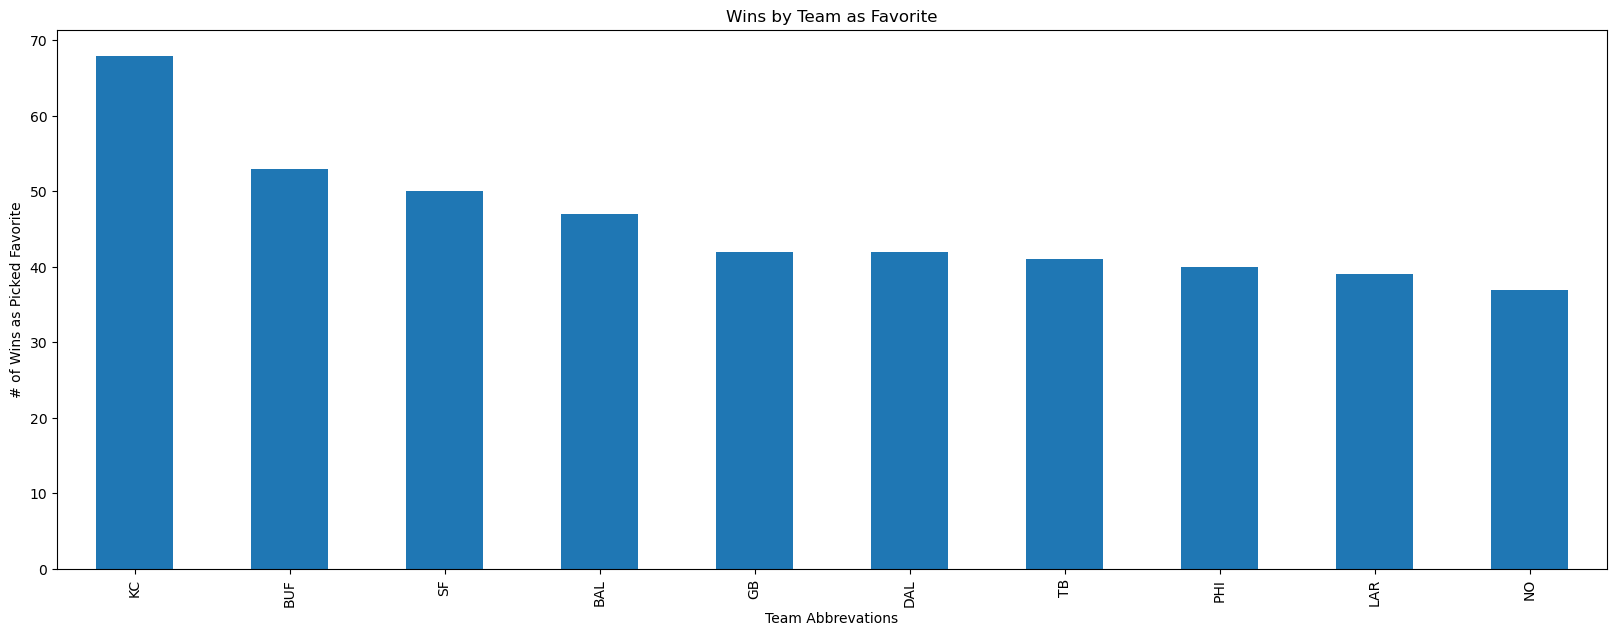

In [15]:
# Display the top 10 teams in a bar chart to show which favorites hit the moneyline the most.
favorite_wins.head(10).plot(kind='bar', figsize=(20,7))
plt.title('Wins by Team as Favorite')
plt.xlabel('Team Abbrevations')
plt.ylabel('# of Wins as Picked Favorite')
plt.show()

In [16]:
# Cut down cleaned data to where the underdog won instead of the favorite.
underdog_df = clean_df[clean_df['team_favorite_id'] != clean_df['result']]
underdog_df

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,team_home_id,team_away_id,result
12411,9/5/2019,2019,1,False,Chicago Bears,3,10,Green Bay Packers,CHI,CHI,GB,GB
12412,9/8/2019,2019,1,False,Arizona Cardinals,27,27,Detroit Lions,DET,ARI,DET,Tie
12414,9/8/2019,2019,1,False,Cleveland Browns,13,43,Tennessee Titans,CLE,CLE,TEN,TEN
12421,9/8/2019,2019,1,False,New York Jets,16,17,Buffalo Bills,NYJ,NYJ,BUF,BUF
12424,9/8/2019,2019,1,False,Tampa Bay Buccaneers,17,31,San Francisco 49ers,TB,TB,SF,SF
...,...,...,...,...,...,...,...,...,...,...,...,...
13790,1/14/2024,2023,Wildcard,True,Dallas Cowboys,32,48,Green Bay Packers,DAL,DAL,GB,GB
13793,1/15/2024,2023,Wildcard,True,Tampa Bay Buccaneers,32,9,Philadelphia Eagles,PHI,TB,PHI,TB
13796,1/21/2024,2023,Division,True,Buffalo Bills,24,27,Kansas City Chiefs,BUF,BUF,KC,KC
13798,1/28/2024,2023,Conference,True,Baltimore Ravens,10,17,Kansas City Chiefs,BAL,BAL,KC,KC


In [17]:
# Eliminate games from the data that resulted in Ties and count those games by abbreviations in result again.
underdog_df = underdog_df[underdog_df['result'] != 'Tie']
underdog_wins = underdog_df['result'].value_counts()

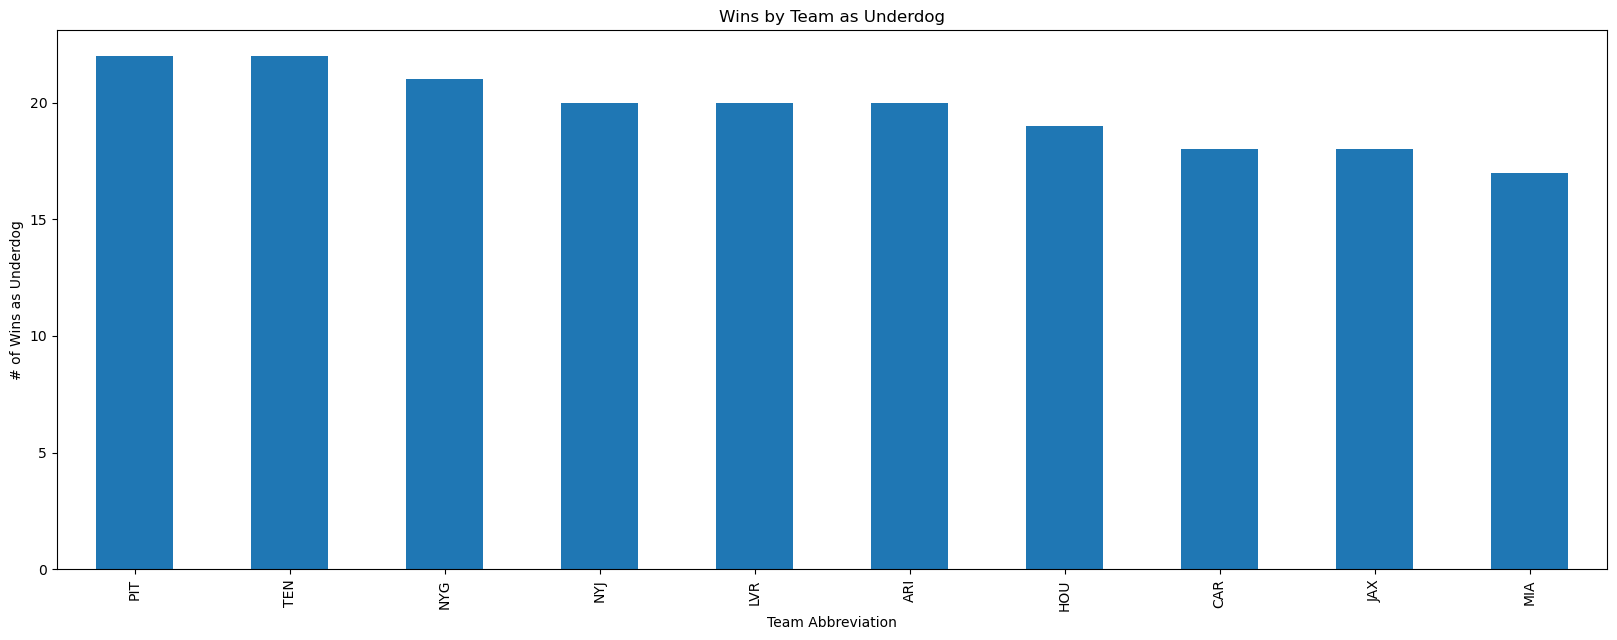

In [18]:
# Plot the the top 10 temas that won most as an underdog.
underdog_wins.head(10).plot(kind='bar', figsize=(20,7))
plt.title('Wins by Team as Underdog')
plt.xlabel('Team Abbreviation')
plt.ylabel('# of Wins as Underdog')
plt.show()

In [19]:
# Edit original DataFrame to see which teams were weakest at home.
home_weak = clean_df[clean_df['team_home_id'] != clean_df['result']]
home_weak

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,team_home_id,team_away_id,result
12411,9/5/2019,2019,1,False,Chicago Bears,3,10,Green Bay Packers,CHI,CHI,GB,GB
12412,9/8/2019,2019,1,False,Arizona Cardinals,27,27,Detroit Lions,DET,ARI,DET,Tie
12413,9/8/2019,2019,1,False,Carolina Panthers,27,30,Los Angeles Rams,LAR,CAR,LAR,LAR
12414,9/8/2019,2019,1,False,Cleveland Browns,13,43,Tennessee Titans,CLE,CLE,TEN,TEN
12416,9/8/2019,2019,1,False,Jacksonville Jaguars,26,40,Kansas City Chiefs,KC,JAX,KC,KC
...,...,...,...,...,...,...,...,...,...,...,...,...
13785,1/7/2024,2023,18,False,San Francisco 49ers,20,21,Los Angeles Rams,SF,SF,LAR,LAR
13787,1/7/2024,2023,18,False,Washington Commanders,10,38,Dallas Cowboys,DAL,WAS,DAL,DAL
13790,1/14/2024,2023,Wildcard,True,Dallas Cowboys,32,48,Green Bay Packers,DAL,DAL,GB,GB
13796,1/21/2024,2023,Division,True,Buffalo Bills,24,27,Kansas City Chiefs,BUF,BUF,KC,KC


In [20]:
# Gather the count of home losses for each team.
home_weak = home_weak['team_home_id'].value_counts()
home_weak

team_home_id
WAS    30
ARI    29
CAR    28
HOU    27
JAX    26
NYJ    26
CHI    24
NYG    24
LAC    24
DET    24
ATL    23
NE     23
DEN    22
IND    21
LVR    20
TEN    20
CIN    20
TB     20
NO     19
PHI    19
SEA    18
MIN    18
SF     17
BAL    16
PIT    16
LAR    16
MIA    15
CLE    14
BUF    13
DAL    13
KC     13
GB     11
Name: count, dtype: int64

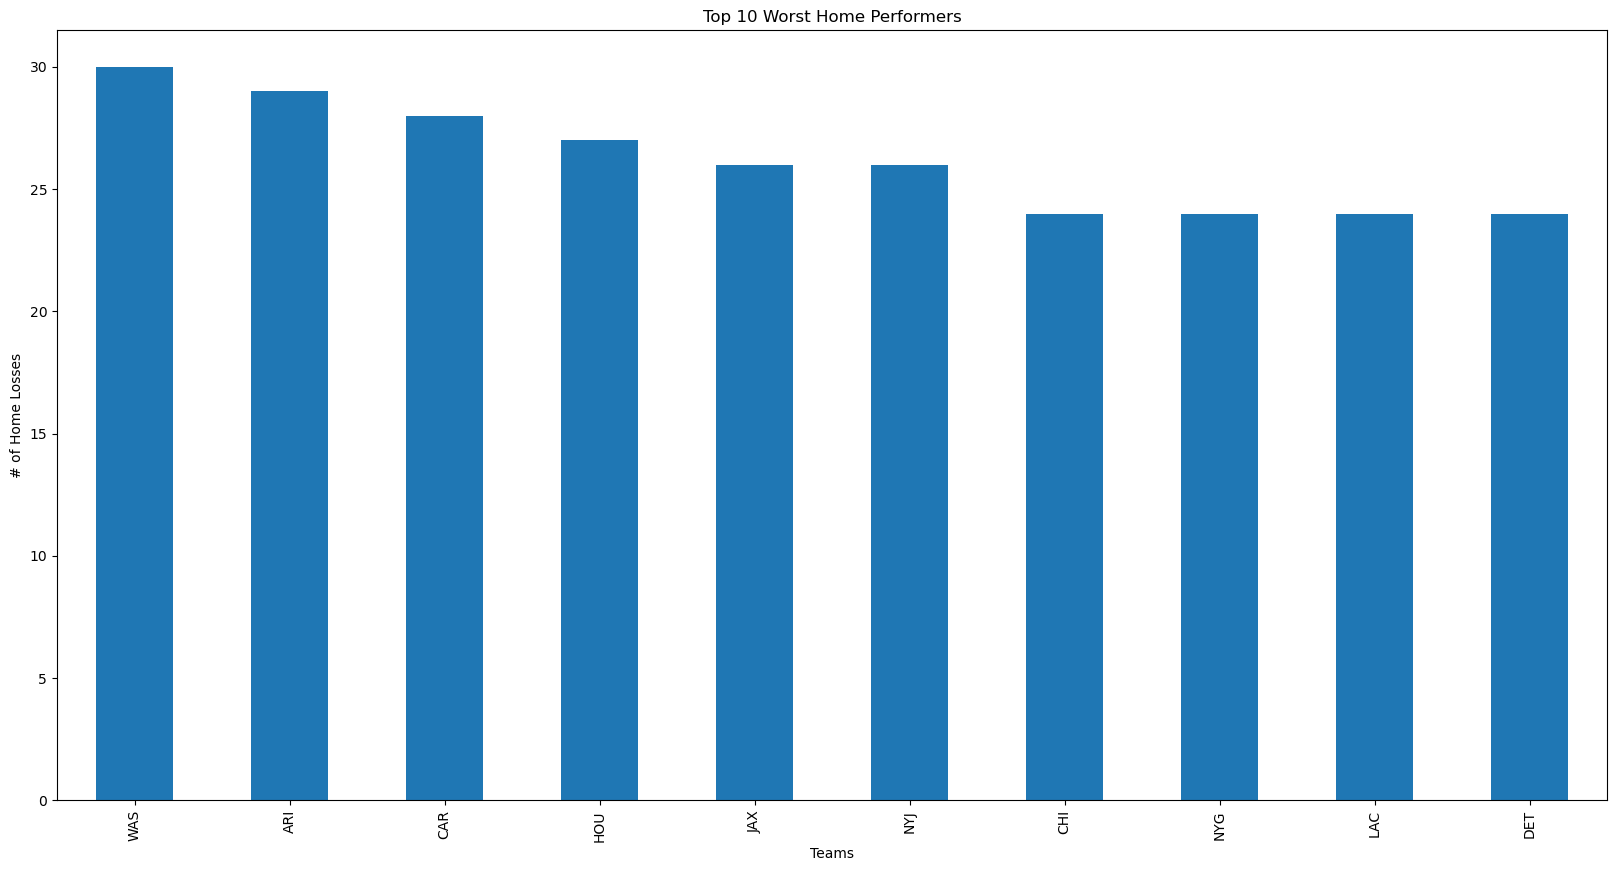

In [31]:
# Plot the 10 teams that performed worst with home advantage.
home_weak.head(10).plot(kind='bar', figsize=(20,10))
plt.title('Top 10 Worst Home Performers')
plt.xlabel('Teams')
plt.ylabel('# of Home Losses')
plt.show()

In [32]:
away_strong = clean_df[clean_df['team_away_id'] == clean_df['result']]
away_strong

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,team_home_id,team_away_id,result
12411,9/5/2019,2019,1,False,Chicago Bears,3,10,Green Bay Packers,CHI,CHI,GB,GB
12413,9/8/2019,2019,1,False,Carolina Panthers,27,30,Los Angeles Rams,LAR,CAR,LAR,LAR
12414,9/8/2019,2019,1,False,Cleveland Browns,13,43,Tennessee Titans,CLE,CLE,TEN,TEN
12416,9/8/2019,2019,1,False,Jacksonville Jaguars,26,40,Kansas City Chiefs,KC,JAX,KC,KC
12418,9/8/2019,2019,1,False,Miami Dolphins,10,59,Baltimore Ravens,BAL,MIA,BAL,BAL
...,...,...,...,...,...,...,...,...,...,...,...,...
13785,1/7/2024,2023,18,False,San Francisco 49ers,20,21,Los Angeles Rams,SF,SF,LAR,LAR
13787,1/7/2024,2023,18,False,Washington Commanders,10,38,Dallas Cowboys,DAL,WAS,DAL,DAL
13790,1/14/2024,2023,Wildcard,True,Dallas Cowboys,32,48,Green Bay Packers,DAL,DAL,GB,GB
13796,1/21/2024,2023,Division,True,Buffalo Bills,24,27,Kansas City Chiefs,BUF,BUF,KC,KC


In [35]:
away_strong_count = away_strong['team_away_id'].value_counts()

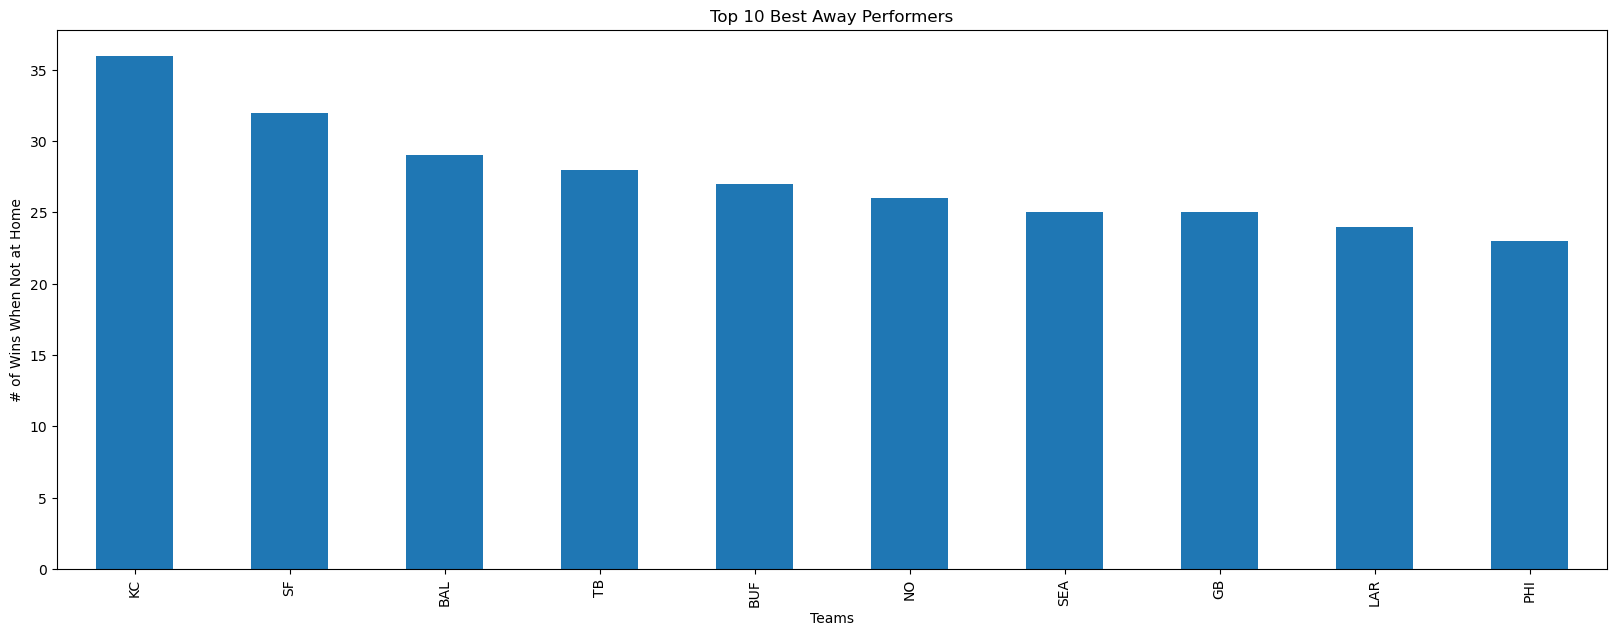

In [40]:
away_strong_count.head(10).plot(kind='bar', figsize=(20,7))
plt.xlabel('Teams')
plt.ylabel('# of Wins When Not at Home')
plt.title('Top 10 Best Away Performers')
plt.show()

In [42]:

outcome_df = pd.DataFrame(favorite_wins)
outcome_df = outcome_df.rename(columns={'count' : 'favorite win count'})
outcome_df['underdog win count'] = ''
outcome_df['underdog win count'] = underdog_wins
outcome_df

,favorite win count,underdog win count
result,,
KC,68,9
BUF,53,10
SF,50,12
BAL,47,11
GB,42,17
DAL,42,9
TB,41,13
PHI,40,9
LAR,39,12


In [43]:
outcome_df['total won games'] = outcome_df['favorite win count'] + outcome_df['underdog win count']
outcome_df

,favorite win count,underdog win count,total won games
result,,,
KC,68,9,77
BUF,53,10,63
SF,50,12,62
BAL,47,11,58
GB,42,17,59
DAL,42,9,51
TB,41,13,54
PHI,40,9,49
LAR,39,12,51


In [45]:
outcome_df['favorite percentage'] = ''
outcome_df['underdog percentage'] = ''

for index, row in outcome_df.iterrows():
    outcome_df.at[index, 'favorite percentage'] = round(row['favorite win count'] / row['total won games'] * 100, 2)
    outcome_df.at[index, 'underdog percentage'] = round(row['underdog win count'] / row['total won games'] * 100, 2)

outcome_df

,favorite win count,underdog win count,total won games,favorite percentage,underdog percentage
result,,,,,
KC,68,9,77,88.31,11.69
BUF,53,10,63,84.13,15.87
SF,50,12,62,80.65,19.35
BAL,47,11,58,81.03,18.97
GB,42,17,59,71.19,28.81
DAL,42,9,51,82.35,17.65
TB,41,13,54,75.93,24.07
PHI,40,9,49,81.63,18.37
LAR,39,12,51,76.47,23.53
